In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [4]:
#renaming the columns
df = df.rename(columns={'v1': 'target', 'v2': 'message'})

In [5]:
df.shape

(5572, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   target   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.sample(10)

,target,message
3658,ham,Wait.i will come out.. &lt;#&gt; min:)
3251,ham,Come to medical college at 7pm ......forward i...
2055,ham,"Sir, I am waiting for your mail."
777,ham,\Hi its Kate it was lovely to see you tonight ...
681,ham,ÌÏ log off 4 wat. It's sdryb8i
3315,ham,I know girls always safe and selfish know i go...
5081,ham,\HI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OUT VI...
1665,ham,Dunno cos i was v late n when i reach they ins...
5321,ham,Ok no problem... Yup i'm going to sch at 4 if ...
4228,ham,Have you bookedthe hut? And also your time off...


In [8]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [9]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
df.duplicated().sum()

np.int64(403)

In [11]:
df.drop_duplicates(keep = 'first', inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

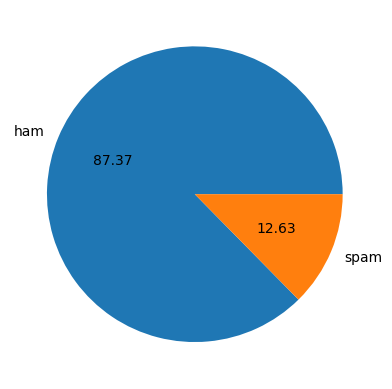

In [13]:
#Let's draw pie chart for spam and ham
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [14]:
import nltk
nltk.download('punkt') #Installing all the dependencies for tokenization
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [15]:
#Let's create different features and see how many words are there in ham and spam messages and also number of characters and number of sentences
df['num_characters'] = df['message'].apply(len)
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [16]:
df

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [17]:
#Apply describe method on dataframe for differnt target values
# ham
df[df[ 'target'] == 0][[ 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df[ 'target'] == 1][[ 'num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [19]:
!pip install seaborn

/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/bin/pip: line 2: /Users/ankitpokhrel/Downloads/All projects/ML Projects/myenv/bin/python3.12: No such file or directory
/Users/ankitpokhrel/Downloads/All_projects/ML_Projects/myenv/bin/pip: line 2: exec: /Users/ankitpokhrel/Downloads/All projects/ML Projects/myenv/bin/python3.12: cannot execute: No such file or directory


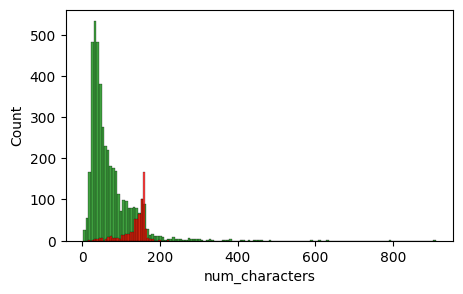

In [20]:
#Let's plot the histogram for the features we created above
import seaborn as sns
plt.figure(figsize=(5,3))
sns.histplot(df[df['target'] == 0]['num_characters'], color='green')
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')
plt.show()

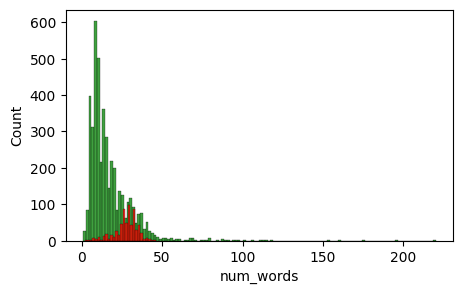

In [21]:
#Let's plot the histogram for the features we created above
import seaborn as sns
plt.figure(figsize=(5,3))
sns.histplot(df[df['target'] == 0]['num_words'], color='green')
sns.histplot(df[df['target'] == 1]['num_words'], color='red')
plt.show()

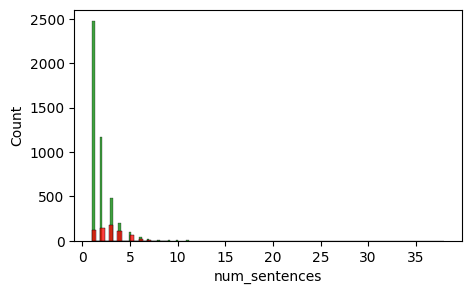

In [22]:
#Let's plot the histogram for the features we created above
import seaborn as sns
plt.figure(figsize=(5,3))
sns.histplot(df[df['target'] == 0]['num_sentences'], color='green')
sns.histplot(df[df['target'] == 1]['num_sentences'], color='red')
plt.show()

### Data Preprocessing Steps
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [23]:
df

,target,message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [ ]:
#Lower case
df['message'] = df['message'].apply(lambda x: x.lower())
#Tokenization
df['message'] = df['message'].apply(nltk.word_tokenize)
#Removing special characters
import string
def remove_special_characters(text):
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    return y
df['message'] = df['message'].apply(remove_special_characters)
#Removing stop words and punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
def remove_stopwords(text):
    y = []
    for i in text:
        if i not in stop_words and i not in string.punctuation:
            y.append(i)
    return y
df['message'] = df['message'].apply(remove_stopwords)
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def stemming(text):
    y = []
    for i in text:
        y.append(ps.stem(i))
    return y
df['message'] = df['message'].apply(stemming)   

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ankitpokhrel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df

,target,message,num_characters,num_words,num_sentences
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",111,24,2
1,0,"[ok, lar, joke, wif, u, oni]",29,8,2
2,1,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",155,37,2
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",49,13,1
4,0,"[nah, think, goe, usf, live, around, though]",61,15,1
...,...,...,...,...,...
5567,1,"[2nd, time, tri, 2, contact, u, pound, prize, ...",161,35,4
5568,0,"[b, go, esplanad, fr, home]",37,9,1
5569,0,"[piti, mood, suggest]",57,15,2
5570,0,"[guy, bitch, act, like, interest, buy, someth,...",125,27,1


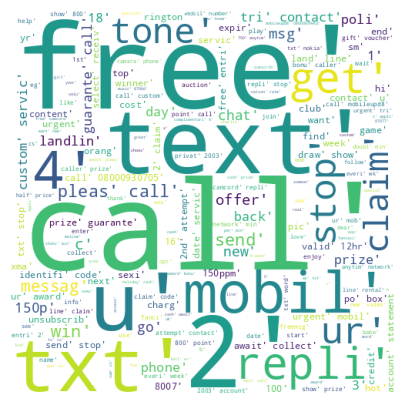

In [26]:
# Word cloud of spam messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=5, background_color='white')

spam_text = (
    df[df['target'] == 1]['message']
    .dropna()
    .astype(str)
    .str.cat(sep=" ")
)

spam_wc = wc.generate(spam_text)

plt.figure(figsize=(5,5))
plt.imshow(spam_wc)
plt.axis('off')
plt.show()

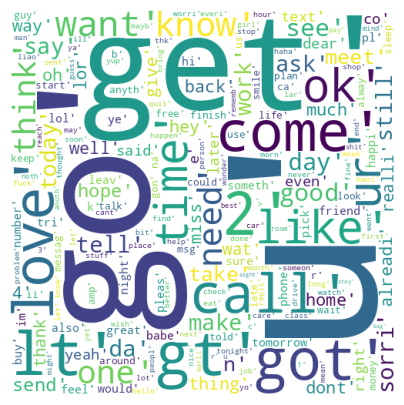

In [27]:
# Word cloud of spam messages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(width=500, height=500, min_font_size=5, background_color='white')

ham_text = (
    df[df['target'] == 0]['message']
    .dropna()
    .astype(str)
    .str.cat(sep=" ")
)

ham_wc = wc.generate(ham_text)

plt.figure(figsize=(5,5))
plt.imshow(ham_wc)
plt.axis('off')
plt.show()

In [28]:
#Top 30 most common words in spam messages
from collections import Counter
spam_words = []
for msg in df[df['target'] == 1]['message']:
    for word in msg:
        spam_words.append(word) 

#Top 30 most common words in ham messages
from collections import Counter
ham_words = []
for msg in df[df['target'] == 0]['message']:
    for word in msg:
        ham_words.append(word)
        
spam_words_counter = Counter(spam_words)
most_common_spam_words = spam_words_counter.most_common(30)
most_common_spam_words


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

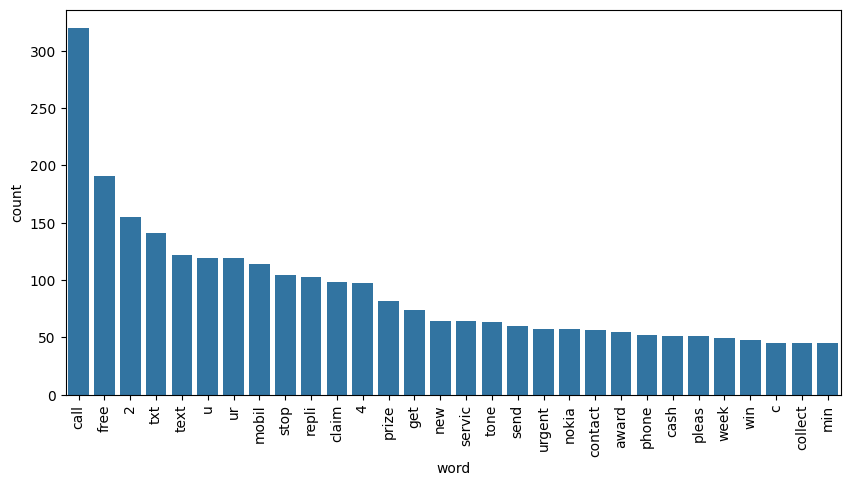

In [29]:
#Creating a dataframe of most common spam words and plotting a bar graph
spam_df = pd.DataFrame(most_common_spam_words, columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
ham_words_counter = Counter(ham_words)
most_common_ham_words = ham_words_counter.most_common(30)
most_common_ham_words

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

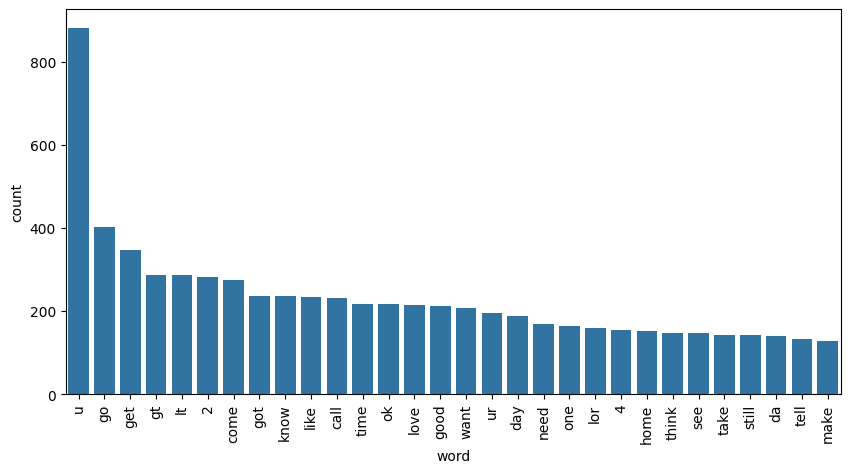

In [31]:
#Creating a dataframe of most common ham words and plotting a bar graph
ham_df = pd.DataFrame(most_common_ham_words, columns=['word', 'count'])
plt.figure(figsize=(10,5))
sns.barplot(x='word', y='count', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

In [32]:
#Remove '2' and '4' from the message column
def remove_numbers(text):
    y = []
    for i in text:
        if not i.isdigit():
            y.append(i)
    return y   
df['message'] = df['message'].apply(remove_numbers)

In [33]:
df

,target,message,num_characters,num_words,num_sentences
0,0,"[go, jurong, point, crazi, avail, bugi, n, gre...",111,24,2
1,0,"[ok, lar, joke, wif, u, oni]",29,8,2
2,1,"[free, entri, wkli, comp, win, fa, cup, final,...",155,37,2
3,0,"[u, dun, say, earli, hor, u, c, alreadi, say]",49,13,1
4,0,"[nah, think, goe, usf, live, around, though]",61,15,1
...,...,...,...,...,...
5567,1,"[2nd, time, tri, contact, u, pound, prize, cla...",161,35,4
5568,0,"[b, go, esplanad, fr, home]",37,9,1
5569,0,"[piti, mood, suggest]",57,15,2
5570,0,"[guy, bitch, act, like, interest, buy, someth,...",125,27,1


In [34]:
#Changing list of words back to string
df['message'] = df['message'].apply(lambda x: ' '.join(x))

### Text Vectorization
- Bag of Words

In [35]:
#Vectorization using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(df['message']).toarray()
y = df['target'].values

In [36]:
X.shape , y.shape

((5169, 6261), (5169,))

In [37]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [38]:
#importing all the Naive Bayes classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
#Creating object for all the three classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [40]:
#Fitting the Naive Bayes classifier
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)

BernoulliNB()

In [41]:
#Predicting on the test data
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

In [42]:
# Metrics for GaussianNB
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))

GaussianNB Accuracy: 0.8762088974854932
GaussianNB Confusion Matrix:
 [[792 104]
 [ 24 114]]
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.93       896
           1       0.52      0.83      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.86      0.78      1034
weighted avg       0.91      0.88      0.89      1034



In [43]:
# Metrics for MultinomialNB
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("MultinomialNB Classification Report:\n", classification_report(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.9574468085106383
MultinomialNB Confusion Matrix:
 [[865  31]
 [ 13 125]]
MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.80      0.91      0.85       138

    accuracy                           0.96      1034
   macro avg       0.89      0.94      0.91      1034
weighted avg       0.96      0.96      0.96      1034



In [44]:
# Metrics for BernoulliNB
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("BernoulliNB Classification Report:\n", classification_report(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.9671179883945842
BernoulliNB Confusion Matrix:
 [[890   6]
 [ 28 110]]
BernoulliNB Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.95      0.80      0.87       138

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.92      1034
weighted avg       0.97      0.97      0.97      1034



### Using TF-IDF Vectorizer

In [45]:
# importing necessary libraries for TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer


In [46]:
#Vectorization using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['message']).toarray()
y = df['target'].values


In [47]:
X.shape , y.shape

((5169, 6261), (5169,))

In [48]:
# Creating train test split for TF-IDF features
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [49]:
#Importing all the Naive Bayes classifiers again and creating objects for all the three classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [50]:
#Fitting the Naive Bayes classifiers
gnb.fit(X_train, y_train)
mnb.fit(X_train, y_train)
bnb.fit(X_train, y_train)
#Predicting on the test data
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

In [51]:
#Evaluation Metrics for GaussianNB
print("GaussianNB Accuracy:", accuracy_score(y_test, y_pred_gnb))
print("GaussianNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gnb))
print("GaussianNB Classification Report:\n", classification_report(y_test, y_pred_gnb))

GaussianNB Accuracy: 0.8713733075435203
GaussianNB Confusion Matrix:
 [[793 103]
 [ 30 108]]
GaussianNB Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.92       896
           1       0.51      0.78      0.62       138

    accuracy                           0.87      1034
   macro avg       0.74      0.83      0.77      1034
weighted avg       0.90      0.87      0.88      1034



In [52]:
#Evaluation Metrics for MultinomialNB
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("MultinomialNB Classification Report:\n", classification_report(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.9564796905222437
MultinomialNB Confusion Matrix:
 [[896   0]
 [ 45  93]]
MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       896
           1       1.00      0.67      0.81       138

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [53]:
#Evaluation Metrics for BinomialNB
print("BernoulliNB Accuracy:", accuracy_score(y_test, y_pred_bnb))
print("BernoulliNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_bnb))
print("BernoulliNB Classification Report:\n", classification_report(y_test, y_pred_bnb))

BernoulliNB Accuracy: 0.9671179883945842
BernoulliNB Confusion Matrix:
 [[890   6]
 [ 28 110]]
BernoulliNB Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       896
           1       0.95      0.80      0.87       138

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.92      1034
weighted avg       0.97      0.97      0.97      1034



Since the multinomial with TF-IDF has 0 false negatives, it is the best model for spam detection in this case.
 ```[[896   0] ``` 
   ``` [ 45  93]] ```


In [54]:
#Limiting the max features to 3000 in TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['message']).toarray()
y = df['target'].values
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#Importing only MultinomialNB classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
mnb = MultinomialNB()
#Fitting the MultinomialNB classifier
mnb.fit(X_train, y_train)
#Predicting on the test data
y_pred_mnb = mnb.predict(X_test)    
#Evaluation Metrics for MultinomialNB
print("MultinomialNB Accuracy:", accuracy_score(y_test, y_pred_mnb))
print("MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mnb))
print("MultinomialNB Classification Report:\n", classification_report(y_test, y_pred_mnb))

MultinomialNB Accuracy: 0.9729206963249516
MultinomialNB Confusion Matrix:
 [[896   0]
 [ 28 110]]
MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.80      0.89       138

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.94      1034
weighted avg       0.97      0.97      0.97      1034



In [55]:
#Creating pipeline for whole process
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('mnb', MultinomialNB())
])
X = df['message']
y = df['target']
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
#Fitting the pipeline
pipeline.fit(X_train, y_train)
#Predicting on the test data
y_pred = pipeline.predict(X_test)
#Evaluation Metrics
print("Pipeline MultinomialNB Accuracy:", accuracy_score(y_test, y_pred))
print("Pipeline MultinomialNB Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Pipeline MultinomialNB Classification Report:\n", classification_report(y_test, y_pred))

Pipeline MultinomialNB Accuracy: 0.9700193423597679
Pipeline MultinomialNB Confusion Matrix:
 [[896   0]
 [ 31 107]]
Pipeline MultinomialNB Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.78      0.87       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [56]:
# pickle the model
import pickle
pickle.dump(pipeline, open('spam_classifier_model.pkl', 'wb'))